Average of 209 arrests per neighborhood.


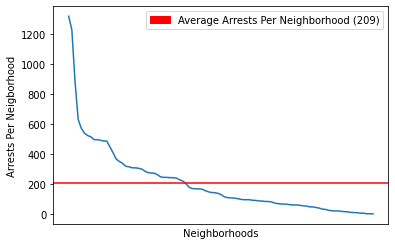

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# turn arrests.csv file to dataframe
arrests = pd.read_csv("arrest.csv")

# all masks that involve pedestrian accidents
robbery_mask = arrests['OFFENSES'].str.contains('robbery', na = False, case = False) 
disorderly_mask = arrests['OFFENSES'].str.contains('Disorderly conduct', na = False, case = False) 
aggravate_mask = arrests['OFFENSES'].str.contains('Aggravated assault', na = False, case = False) 
endanger_mask = arrests['OFFENSES'].str.contains('Recklessy Endangering Another Person', na = False, case = False)
assault_mask = arrests['OFFENSES'].str.contains('Simple assault', na = False, case = False)

# data set with arrests involving pedestrians
pedestrian_accidents = arrests[robbery_mask | disorderly_mask | aggravate_mask | endanger_mask | assault_mask]

# make a line plot with neighborhoods and all arrests
rest = pedestrian_accidents['INCIDENTNEIGHBORHOOD'].value_counts()
arrests_plot = rest.plot(kind="line")
arrests_plot = plt.axhline(209, color='red')

# average arrests per neighborhood
count = 0
all = 0
for x in rest:
    count += 1
    all += x
print("Average of", int(all / count), "arrests per neighborhood.")

# set legend, x-axis, y-axis
patch = mpatches.Patch(color='red', label='Average Arrests Per Neighborhood (209)')
arrests_plot = plt.legend(handles=[patch])
arrests_plot = plt.xticks(labels=[], ticks=[])
arrests_plot = plt.xlabel("Neighborhoods")
arrests_plot = plt.ylabel("Arrests Per Neigborhood")

In [1]:
# sort through neighborhoods and find medians of each
neighborhoods = []
med_ages = []
for x in pedestrian_accidents['INCIDENTNEIGHBORHOOD'].unique():
    mask = pedestrian_accidents['INCIDENTNEIGHBORHOOD'] == x
    neighborhood_sort = pedestrian_accidents[mask]
    age = neighborhood_sort["AGE"].median()
    neighborhoods.append(x)
    med_ages.append(age)
    
# create new dataframe with neighborhoods and median age as columns
data1 = {
  "neighborhood": neighborhoods,
  "age": med_ages
}
median_age_df = pd.DataFrame(data1)
in_order_median = median_age_df.sort_values(by=['age'], ascending = False)
print(in_order_median)
median_age_df.plot(kind = "bar")

# set legend, x-axis, y-axis
patch = mpatches.Patch(color='blue', label='Neighborhood')
median_plot = plt.legend(handles=[patch])
median_plot = plt.xticks(labels=[], ticks=[])
median_plot = plt.xlabel("Neighborhoods")
median_plot = plt.ylabel("Median Age")

NameError: name 'pedestrian_accidents' is not defined